# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [72]:
#Tampilkan semua kolom
pd.set_option('display.max_columns', None)

#Load dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [73]:
print(f"Jumlah baris dan kolom: {df.shape}")
print(f"Jenis data dari setiap kolom: \n{df.dtypes}")

missing_values = df.isnull().sum()
print(f"Jumlah missing value per kolom: \n{missing_values}")

# Mengisi missing value pada kolom 'Income' dengan rata-rata
df['Income'] = df['Income'].fillna(df['Income'].mean())
print(f"Jumlah missing value Income setelah diisi: {df['Income'].isnull().sum()}")

Jumlah baris dan kolom: (2240, 29)
Jenis data dari setiap kolom: 
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
Jumlah missing value 

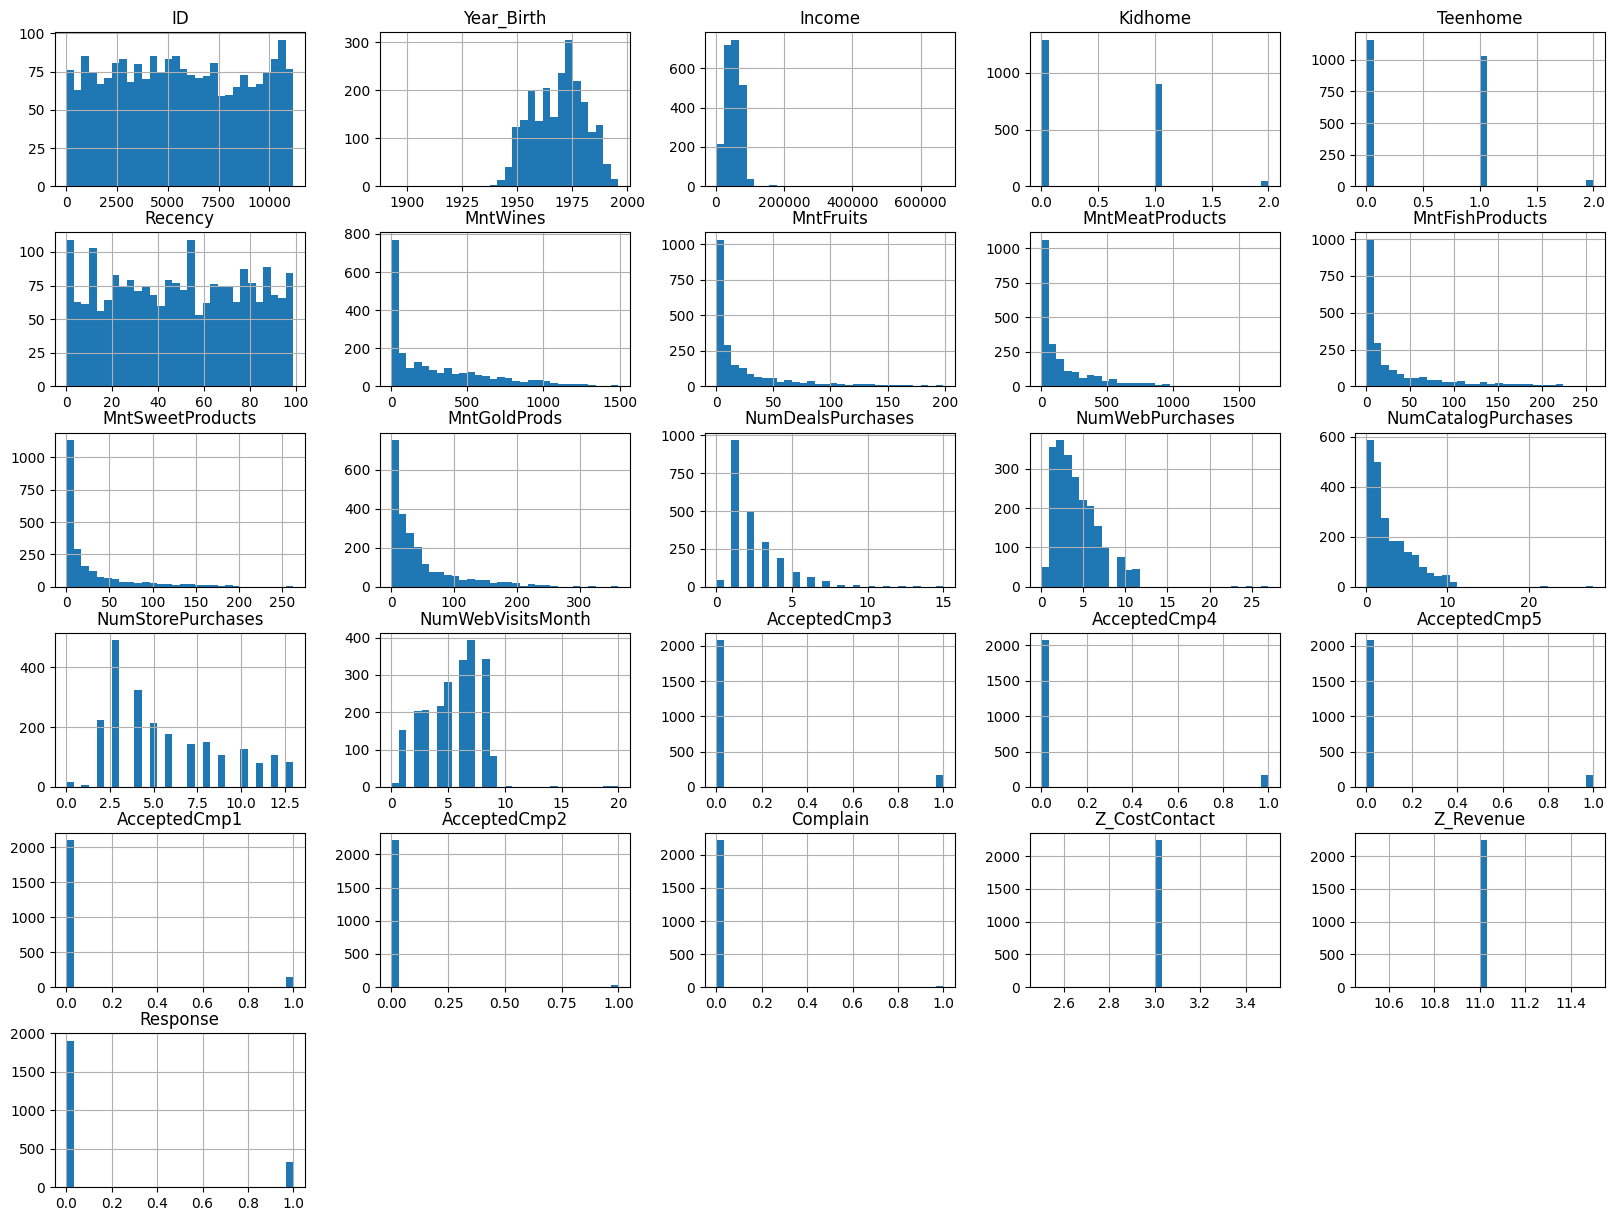

Matriks korelasi:
                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013036  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.160942  0.230176 -0.352111   
Income               0.013036   -0.160942  1.000000 -0.425176  0.019018   
Kidhome              0.002406    0.230176 -0.425176  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019018 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003946  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.576789 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.428747 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.577802 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.437497 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.436162 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.321978 -0.349595 -0.021725   
NumDeal

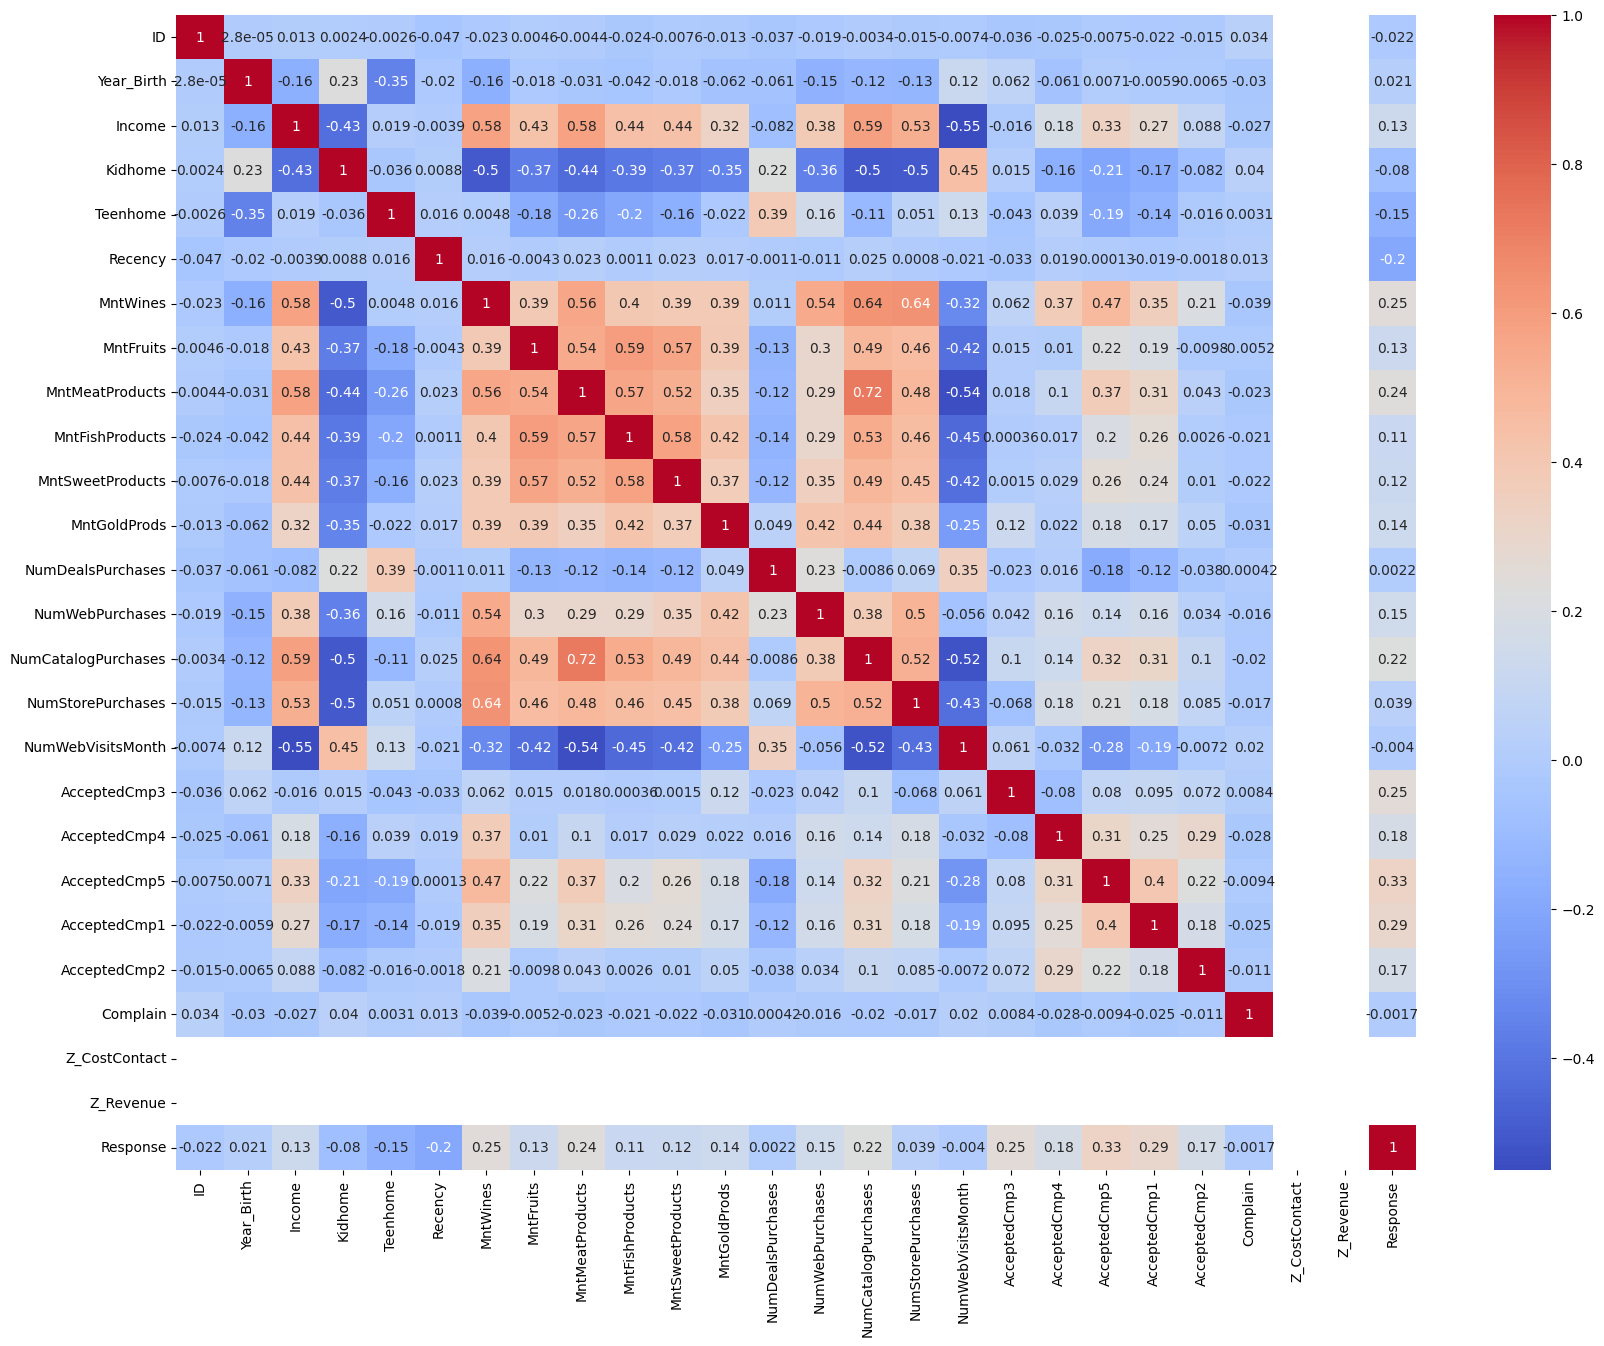

In [74]:
# Histogram untuk variabel numerik
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Periksa hubungan antara variabel menggunakan matriks korelasi
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print("Matriks korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [80]:
df_standarisasi = df.copy()

In [81]:
# Standarisasi fitur numerik kecuali untuk ID dan Year_Birth
numerical_columns = df_standarisasi.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop(['ID', 'Year_Birth'])
scaler = StandardScaler()
df_standarisasi[numerical_columns] = scaler.fit_transform(df_standarisasi[numerical_columns])

# Menggunakan IQR untuk mendeteksi outlier
Q1 = df_standarisasi[numerical_columns].quantile(0.25)
Q3 = df_standarisasi[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

df_standarisasi = df_standarisasi[~((df_standarisasi[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_standarisasi[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

df_standarisasi

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,-0.235826,1.032559,0.906934,08-03-2014,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,4141,1965,Graduation,Together,0.773633,-0.825218,-0.929894,21-08-2013,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,6182,1984,Graduation,Together,-1.022732,1.032559,-0.929894,10-02-2014,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,5324,1981,PhD,Married,0.241519,1.032559,-0.929894,19-01-2014,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
5,7446,1967,Master,Together,0.410102,-0.825218,0.906934,09-09-2013,-1.143438,0.642051,0.394768,-0.305541,-0.687068,0.361924,-0.575619,-0.168236,0.689386,0.457817,1.295237,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,10084,1972,Graduation,Married,-1.111099,2.890335,-0.929894,18-05-2014,-1.385184,-0.894252,-0.611153,-0.704363,-0.320880,-0.655733,-0.518099,-0.168236,-0.750450,-0.568720,-1.166125,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2231,9817,1970,Master,Single,-0.297427,-0.825218,-0.929894,21-08-2012,0.755996,1.631584,-0.409969,-0.106131,-0.449046,-0.413434,-0.460579,-0.168236,1.769263,0.457817,1.910578,1.106087,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2232,8080,1986,Graduation,Single,-1.015941,-0.825218,-0.929894,17-08-2012,0.030758,-0.888309,-0.636301,-0.713225,-0.632140,-0.558813,-0.786526,-0.685887,-1.470368,-0.910898,-0.858455,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2234,8372,1974,Graduation,Married,-0.712133,1.032559,-0.929894,01-07-2013,1.101348,-0.894252,-0.586005,-0.708794,-0.577212,-0.607273,-0.671486,-0.685887,-1.110409,-0.910898,-1.166125,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [82]:
X = df_standarisasi.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

# Lakukan encoding pada kolom kategorikal
label_encoder = LabelEncoder()
X['Education'] = label_encoder.fit_transform(X['Education'])
X['Marital_Status'] = label_encoder.fit_transform(X['Marital_Status'])

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menggunakan PCA untuk mengurangi dimensi data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Menentukan jumlah cluster
k = 2
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_pca)
df_standarisasi['Cluster'] = kmeans.labels_

# Menampilkan hasil klaster
df_standarisasi

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
1,2174,1954,Graduation,Single,-0.235826,1.032559,0.906934,08-03-2014,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0
2,4141,1965,Graduation,Together,0.773633,-0.825218,-0.929894,21-08-2013,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1
3,6182,1984,Graduation,Together,-1.022732,1.032559,-0.929894,10-02-2014,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0
4,5324,1981,PhD,Married,0.241519,1.032559,-0.929894,19-01-2014,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1
5,7446,1967,Master,Together,0.410102,-0.825218,0.906934,09-09-2013,-1.143438,0.642051,0.394768,-0.305541,-0.687068,0.361924,-0.575619,-0.168236,0.689386,0.457817,1.295237,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,10084,1972,Graduation,Married,-1.111099,2.890335,-0.929894,18-05-2014,-1.385184,-0.894252,-0.611153,-0.704363,-0.320880,-0.655733,-0.518099,-0.168236,-0.750450,-0.568720,-1.166125,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0
2231,9817,1970,Master,Single,-0.297427,-0.825218,-0.929894,21-08-2012,0.755996,1.631584,-0.409969,-0.106131,-0.449046,-0.413434,-0.460579,-0.168236,1.769263,0.457817,1.910578,1.106087,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1
2232,8080,1986,Graduation,Single,-1.015941,-0.825218,-0.929894,17-08-2012,0.030758,-0.888309,-0.636301,-0.713225,-0.632140,-0.558813,-0.786526,-0.685887,-1.470368,-0.910898,-0.858455,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0
2234,8372,1974,Graduation,Married,-0.712133,1.032559,-0.929894,01-07-2013,1.101348,-0.894252,-0.586005,-0.708794,-0.577212,-0.607273,-0.671486,-0.685887,-1.110409,-0.910898,-1.166125,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [83]:
# Eksperimen dengan berbagai nilai k
best_k = 0
best_score = 0
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_pca)
    labels = kmeans.labels_
    score = silhouette_score(X_pca, labels)
    print(f'k={k}, Silhouette Score={score}')
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k: {best_k}, Best Silhouette Score: {best_score}')

# Menggunakan k terbaik untuk clustering
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(X_pca)
df_standarisasi['Cluster'] = kmeans.labels_

# Menampilkan hasil klaster
df_standarisasi

k=2, Silhouette Score=0.581818144956399
k=3, Silhouette Score=0.5047872161060719
k=4, Silhouette Score=0.38035423664333884
k=5, Silhouette Score=0.37327840493156084
k=6, Silhouette Score=0.3790005794674598
k=7, Silhouette Score=0.376554474416228
k=8, Silhouette Score=0.3411918712127099
k=9, Silhouette Score=0.34444739333393554
k=10, Silhouette Score=0.3473425378557453
Best k: 2, Best Silhouette Score: 0.581818144956399


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
1,2174,1954,Graduation,Single,-0.235826,1.032559,0.906934,08-03-2014,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0
2,4141,1965,Graduation,Together,0.773633,-0.825218,-0.929894,21-08-2013,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1
3,6182,1984,Graduation,Together,-1.022732,1.032559,-0.929894,10-02-2014,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0
4,5324,1981,PhD,Married,0.241519,1.032559,-0.929894,19-01-2014,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1
5,7446,1967,Master,Together,0.410102,-0.825218,0.906934,09-09-2013,-1.143438,0.642051,0.394768,-0.305541,-0.687068,0.361924,-0.575619,-0.168236,0.689386,0.457817,1.295237,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,10084,1972,Graduation,Married,-1.111099,2.890335,-0.929894,18-05-2014,-1.385184,-0.894252,-0.611153,-0.704363,-0.320880,-0.655733,-0.518099,-0.168236,-0.750450,-0.568720,-1.166125,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0
2231,9817,1970,Master,Single,-0.297427,-0.825218,-0.929894,21-08-2012,0.755996,1.631584,-0.409969,-0.106131,-0.449046,-0.413434,-0.460579,-0.168236,1.769263,0.457817,1.910578,1.106087,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,1
2232,8080,1986,Graduation,Single,-1.015941,-0.825218,-0.929894,17-08-2012,0.030758,-0.888309,-0.636301,-0.713225,-0.632140,-0.558813,-0.786526,-0.685887,-1.470368,-0.910898,-0.858455,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0
2234,8372,1974,Graduation,Married,-0.712133,1.032559,-0.929894,01-07-2013,1.101348,-0.894252,-0.586005,-0.708794,-0.577212,-0.607273,-0.671486,-0.685887,-1.110409,-0.910898,-1.166125,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,0


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
####################

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

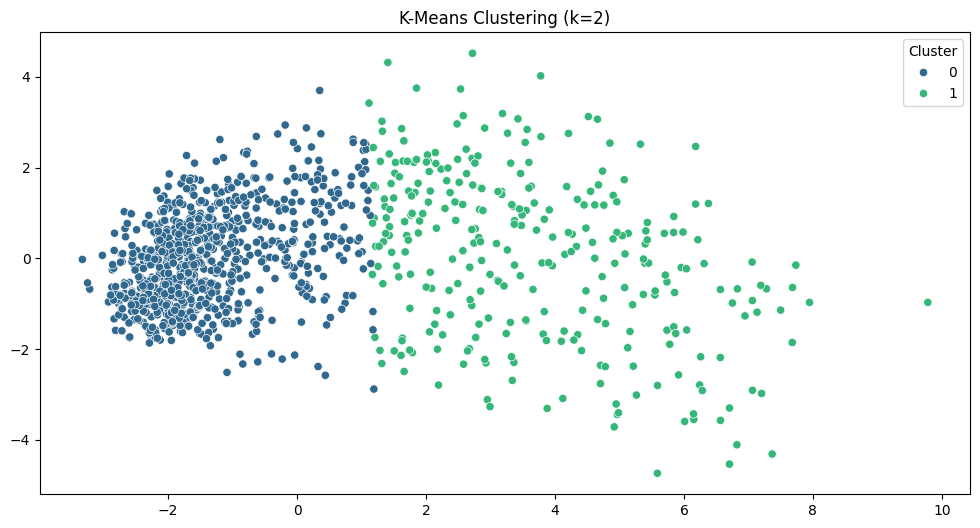

In [84]:
# Visualisasi hasil clustering dengan 2D PCA projection
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_standarisasi['Cluster'], palette='viridis')
plt.title('K-Means Clustering (k=2)')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [85]:
df_clustered = df_standarisasi[['ID', 'Cluster']]

# Gabungkan hasil clustering dengan data normal berdasarkan nilai ID
df_final = pd.merge(df, df_clustered, on='ID', how='left')
df_final.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,NaN
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,1.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1.0


In [87]:
# hapus data yang bernilai NaN pada cluster (outlier)
df_final = df_final.dropna(subset=['Cluster'])
df_final

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,1.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1.0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,3,11,0,0.0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0,1.0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0,0.0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,0.0


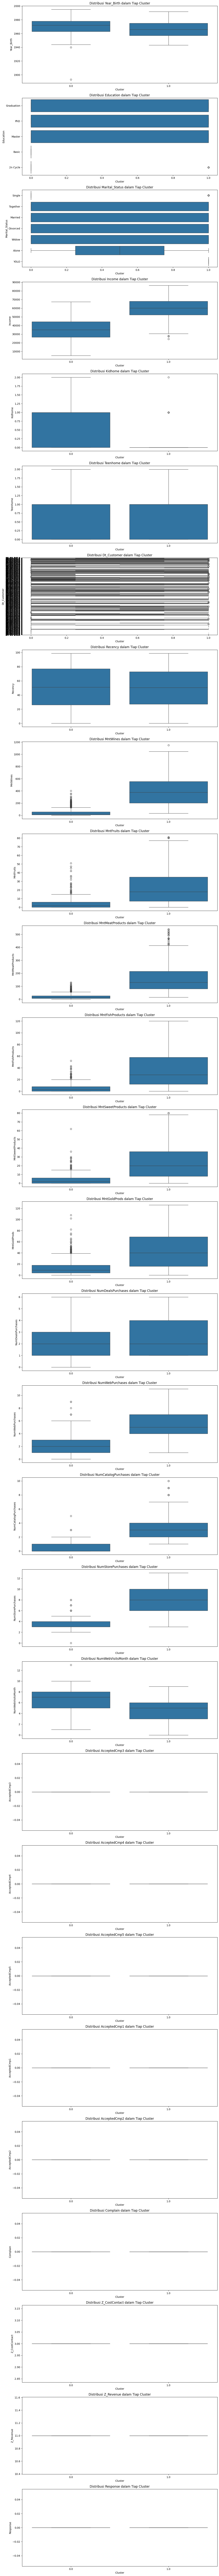

In [88]:
# Tentukan jumlah fitur yang akan divisualisasikan
features = [column for column in df.columns if column not in ['Cluster', 'ID']]

# Buat subplots
num_features = len(features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(12, num_features * 5))

# Visualisasi distribusi fitur dalam tiap cluster
for i, column in enumerate(features):
    sns.boxplot(x='Cluster', y=column, data=df_final, ax=axes[i])
    axes[i].set_title(f'Distribusi {column} dalam Tiap Cluster')

plt.tight_layout()
plt.show()

In [ ]:
# Rata-rata income
income_mean = df_final.groupby('Cluster')['Income'].mean()
print(f"Rata-rata income dalam tiap cluster: \n{income_mean}")

# Rata-rata usia berdasarkan Year_Birth dengan hasil integer
df_final.loc[:, 'Age'] = 2025 - df_final['Year_Birth']
age_mean = df_final.groupby('Cluster')['Age'].mean().astype(int)
print(f"Rata-rata usia dalam tiap cluster: \n{age_mean}")

# Modus pendidikan
education_mode = df_final.groupby('Cluster')['Education'].apply(lambda x: x.mode()[0])
print(f"Modus pendidikan dalam tiap cluster: \n{education_mode}")

# Modus status pernikahan
marital_status_mode = df_final.groupby('Cluster')['Marital_Status'].apply(lambda x: x.mode()[0])
print(f"Modus status pernikahan dalam tiap cluster: \n{marital_status_mode}")


Rata-rata income dalam tiap cluster: 
Cluster
0.0    35422.712150
1.0    59812.693194
Name: Income, dtype: float64
Rata-rata usia dalam tiap cluster: 
Cluster
0.0    54
1.0    58
Name: Age, dtype: int32
Modus pendidikan dalam tiap cluster: 
Cluster
0.0    Graduation
1.0    Graduation
Name: Education, dtype: object
Modus status pernikahan dalam tiap cluster: 
Cluster
0.0    Married
1.0    Married
Name: Marital_Status, dtype: object
Rata-rata NumDealsPurchases dalam tiap cluster: 
Cluster
0.0    1.990888
1.0    2.736364
Name: NumDealsPurchases, dtype: float64


Tulis hasil interpretasinya di sini.
1. Cluster 0:
-  Karakteristik:
    - Age: Cluster ini memiliki rata-rata usia 54 tahun.
    - Income: Penghasilan rata-rata di cluster ini adalah 35422.
    - Mayoritas pelanggan di cluster ini melakukan pembelian melalui deal dalam jumlah yang relatif sedikit, dengan median sekitar 2-3 kali.
    - Mayoritas pelanggan di cluster ini melakukan pembelian online dalam jumlah yang relatif sedikit, dengan median sekitar 2-3 kali
    - Mayoritas mengunjungi website online dengan median sekitar 5 - 8 kali dalam perbulan.
- Interpretasi: Pelanggan di cluster ini cenderung berusia paruh baya dengan penghasilan menengah ke bawah. Mereka cukup aktif dalam mencari informasi produk secara online, namun frekuensi pembelian mereka, baik secara online maupun offline, relatif rendah.
2. Cluster 1:
- Karakteristik:
    - Age: Cluster ini memiliki rata-rata usia 58 tahun.
    - Income: Penghasilan rata-rata di cluster ini adalah 59812.
    - Mayoritas pelanggan di cluster ini melakukan pembelian melalui deal dalam jumlah yang relatif sedikit, dengan median sekitar 2-4 kali.
    - Pelanggan di cluster ini cenderung melakukan pembelian online lebih sering dibandingkan dengan cluster 0. Mediannya lebih tinggi, sekitar 4-5 kali.
    - Mayoritas mengunjungi website online dengan median sekitar 3 - 6 kali dalam perbulan.
-  Interpretasi: Pelanggan di cluster ini umumnya lebih tua dengan daya beli yang lebih tinggi. Mereka lebih aktif dalam berbelanja online dibandingkan dengan cluster 0. Cluster ini merupakan target pasar yang menarik untuk produk premium atau layanan eksklusif.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [105]:
# Simpan data normal sebelum standarisasi
df_normal = pd.read_csv('marketing_campaign.csv', sep='\t')
df_clustered1 = df_final[['ID', 'Cluster']]

# Gabungkan hasil clustering dengan data normal berdasarkan nilai ID
df_final2 = pd.merge(df_normal, df_clustered1, on='ID', how='left')

In [107]:
# Simpan hasil clustering ke dalam file CSV
df_final2.to_csv('marketing_campaign_clustered.csv', index=False)
print("Data berhasil disimpan ke dalam file CSV")

Data berhasil disimpan ke dalam file CSV
